___
# Atividade: Duas variáveis quantitativas com Discriminação Salarial
___

## Aula 05


**Preparo Prévio:**
1. Leitura prévia necessária: Montgomery et al (5ª. Edição): Seção 2.6 (pág. 46) e Exemplo 6.1 (pág. 306).

**Hoje:**
1. Analisar, graficamente, a associação entre duas variáveis quantitativas.
2. Compreender a medida nomeada coeficiente de covariância, no que tange ao significado da fórmula e uso do valor resultante para descrever associação entre variáveis.
3. Avaliar vantagens e desvantagens do coeficiente de covariância e buscar alternativa que compense seu mau uso (coeficiente de correlação).
4. Interpretar, descritivamente, valores dos coeficientes linear e angular para qualquer problema prático.
5. Fechamento do conteúdo.


**Próxima aula:**
1. Estudo para PROJETO 1!

___

## <font color='blue'>Discriminação Salarial</font>

Uma empresa está sendo acusada de pagar um salário maior para os homens do que para as mulheres. 
Para justificar a acusação, apresentou-se uma lista de salários de uma amostra de funcionários. 
Essa empresa tem motivos para se preocupar?

A base de dados `Discriminação.xlsx` apresenta, para cada funcionário, as variáveis:
1. Sexo ('fem' ou 'masc');
2. Anos (anos no emprego; e 
3. Salario (salário mensal, em mil reais). 

Considerando esses dados, faça as seguintes tarefas:

1. Análise descritiva completa considerando as ferramentas estatísticas e computacionais vistas até o momento. Faça essa análise com olhar na preocupação da empresa.
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


In [4]:
dados = pd.read_excel('C:\\Users\\Usuario\\Documents\\Insper\\C.D\\DP\\aula05\\Discriminação.xlsx')

In [5]:
dados.head()

,Sexo,Anos,Salario
0,fem,9,39
1,fem,6,36
2,fem,10,40
3,fem,0,24
4,fem,9,36


In [11]:
sexo = dados.Sexo
anos = dados.Anos
sala = dados.Salario

In [26]:
salariofem = dados.iloc[0:32, (2)]
salariomasc = dados.iloc[33:, (2)]

anosfem = dados.iloc[0:32, (1)]
anosmasc = dados.iloc[33:, (1)]

In [28]:
covmasc = salariomasc.cov(anosmasc)
corrmasc = salariomasc.corr(anosmasc)

covfem = salariofem.cov(anosfem)
corrfem = salariofem.corr(anosfem)

_______________

### Scatter

In [57]:
a = anosmasc.cov(salariomasc) / anosmasc.var()
b = salariomasc.mean() - a * anosmasc.mean() # Salário em média ao entrar na empresa

c = anosfem.cov(salariofem) / anosfem.var()
d = salariofem.mean() - a * anosfem.mean() # Salário em média ao entrar na empresa

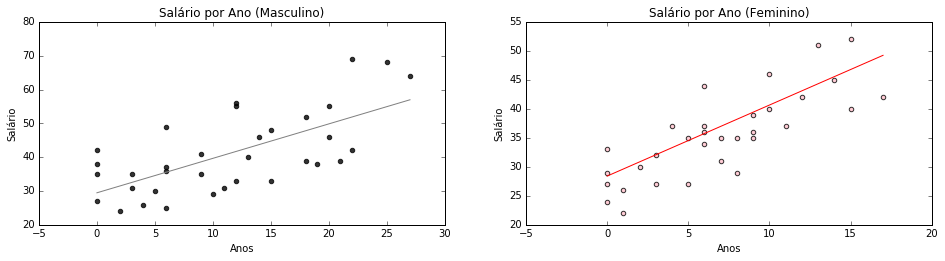

In [83]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(221)
plt.scatter(anosmasc, salariomasc, c = 'black', alpha = 0.8)
plt.title("Salário por Ano (Masculino)")
plt.xlabel("Anos")
plt.ylabel("Salário")
plt.plot((anosmasc.min(), anosmasc.max()), (a * anosmasc.min() + b, a * anosmasc.max() + b), color = 'grey')

plt.subplot(222)
plt.scatter(anosfem, salariofem, c = 'pink', alpha = 0.8)
plt.title("Salário por Ano (Feminino)")
plt.xlabel("Anos")
plt.ylabel("Salário")
plt.plot((anosfem.min(), anosfem.max()), (c * anosfem.min() + d, c * anosfem.max() + d), color = 'red')

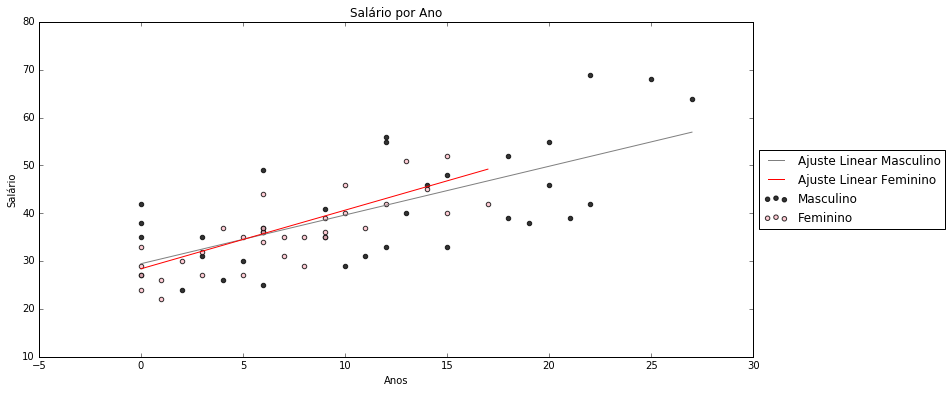

In [93]:
fig = plt.figure(figsize = (16, 6))

plt.scatter(anosmasc, salariomasc, c = 'black', alpha = 0.8)
plt.scatter(anosfem, salariofem, c = 'pink', alpha = 0.8)

plt.title("Salário por Ano")
plt.xlabel("Anos")
plt.ylabel("Salário")

plt.plot((anosmasc.min(), anosmasc.max()), (a * anosmasc.min() + b, a * anosmasc.max() + b), color = 'grey')
plt.plot((anosfem.min(), anosfem.max()), (c * anosfem.min() + d, c * anosfem.max() + d), color = 'red')

# Legenda
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(('Ajuste Linear Masculino','Ajuste Linear Feminino', 'Masculino', 'Feminino'), loc = 'center left', 
          bbox_to_anchor = (1, 0.5))

#### Covariância e Correlação

In [49]:
print("A covariância masculina é: {0} e a feminina é: {1} \n".format(covmasc, covfem))
print("A correlação masculina é: {0} e a feminina é: {1}".format(corrmasc, corrfem))

A covariância masculina é: 63.27272727272727 e a feminina é: 28.933467741935484 

A correlação masculina é: 0.6742016933667216 e a feminina é: 0.8022389898226462


#### Coeficiente linear e Coeficiente angular

In [60]:
print('Ajuste linear entre Anos Masculino e Salário Masculino:\n')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

Ajuste linear entre Anos Masculino e Salário Masculino:

Coeficiente linear: 29.463426185
Coeficiente angular: 1.01881431093


In [64]:
print('Ajuste linear entre Anos Feminino e Salário Feminino:\n')
print('Coeficiente linear:', d)
print('Coeficiente angular:', c)

Ajuste linear entre Anos Feminino e Salário Feminino:

Coeficiente linear: 28.4007257179
Coeficiente angular: 1.22553373185


________________

### Boxplot